In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("raw.csv")

In [5]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [6]:
df['Disease'].nunique()

116

In [7]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               348 non-null    object
 1   Fever                 348 non-null    object
 2   Cough                 348 non-null    object
 3   Fatigue               348 non-null    object
 4   Difficulty Breathing  348 non-null    object
 5   Age                   348 non-null    int64 
 6   Gender                348 non-null    object
 7   Blood Pressure        348 non-null    object
 8   Cholesterol Level     348 non-null    object
 9   Outcome Variable      348 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.3+ KB


In [9]:
df.duplicated().sum()

np.int64(48)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(300, 10)

In [13]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [14]:
numarical_cols=df.select_dtypes(exclude='object').columns.to_list()
catagorical_cols=df.select_dtypes(include='object').columns.to_list()

In [15]:
print(numarical_cols)
print(catagorical_cols)

['Age']
['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


<Axes: xlabel='Gender', ylabel='count'>

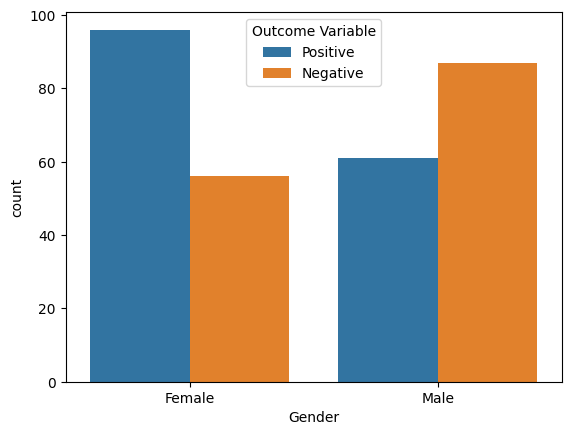

In [16]:
sns.countplot(data=df,x=df['Gender'],hue=df['Outcome Variable'])

In [17]:
df['Outcome Variable'].value_counts()

Outcome Variable
Positive    157
Negative    143
Name: count, dtype: int64

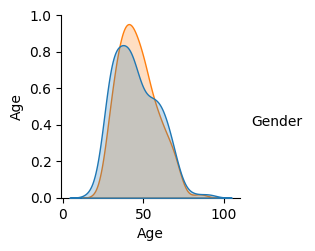

In [18]:
sns.pairplot(df,hue='Gender')

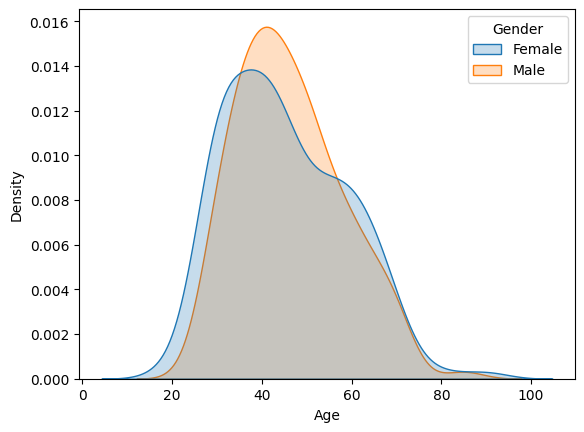

In [19]:
sns.kdeplot(data=df,x='Age',hue='Gender',fill=True)
plt.show()

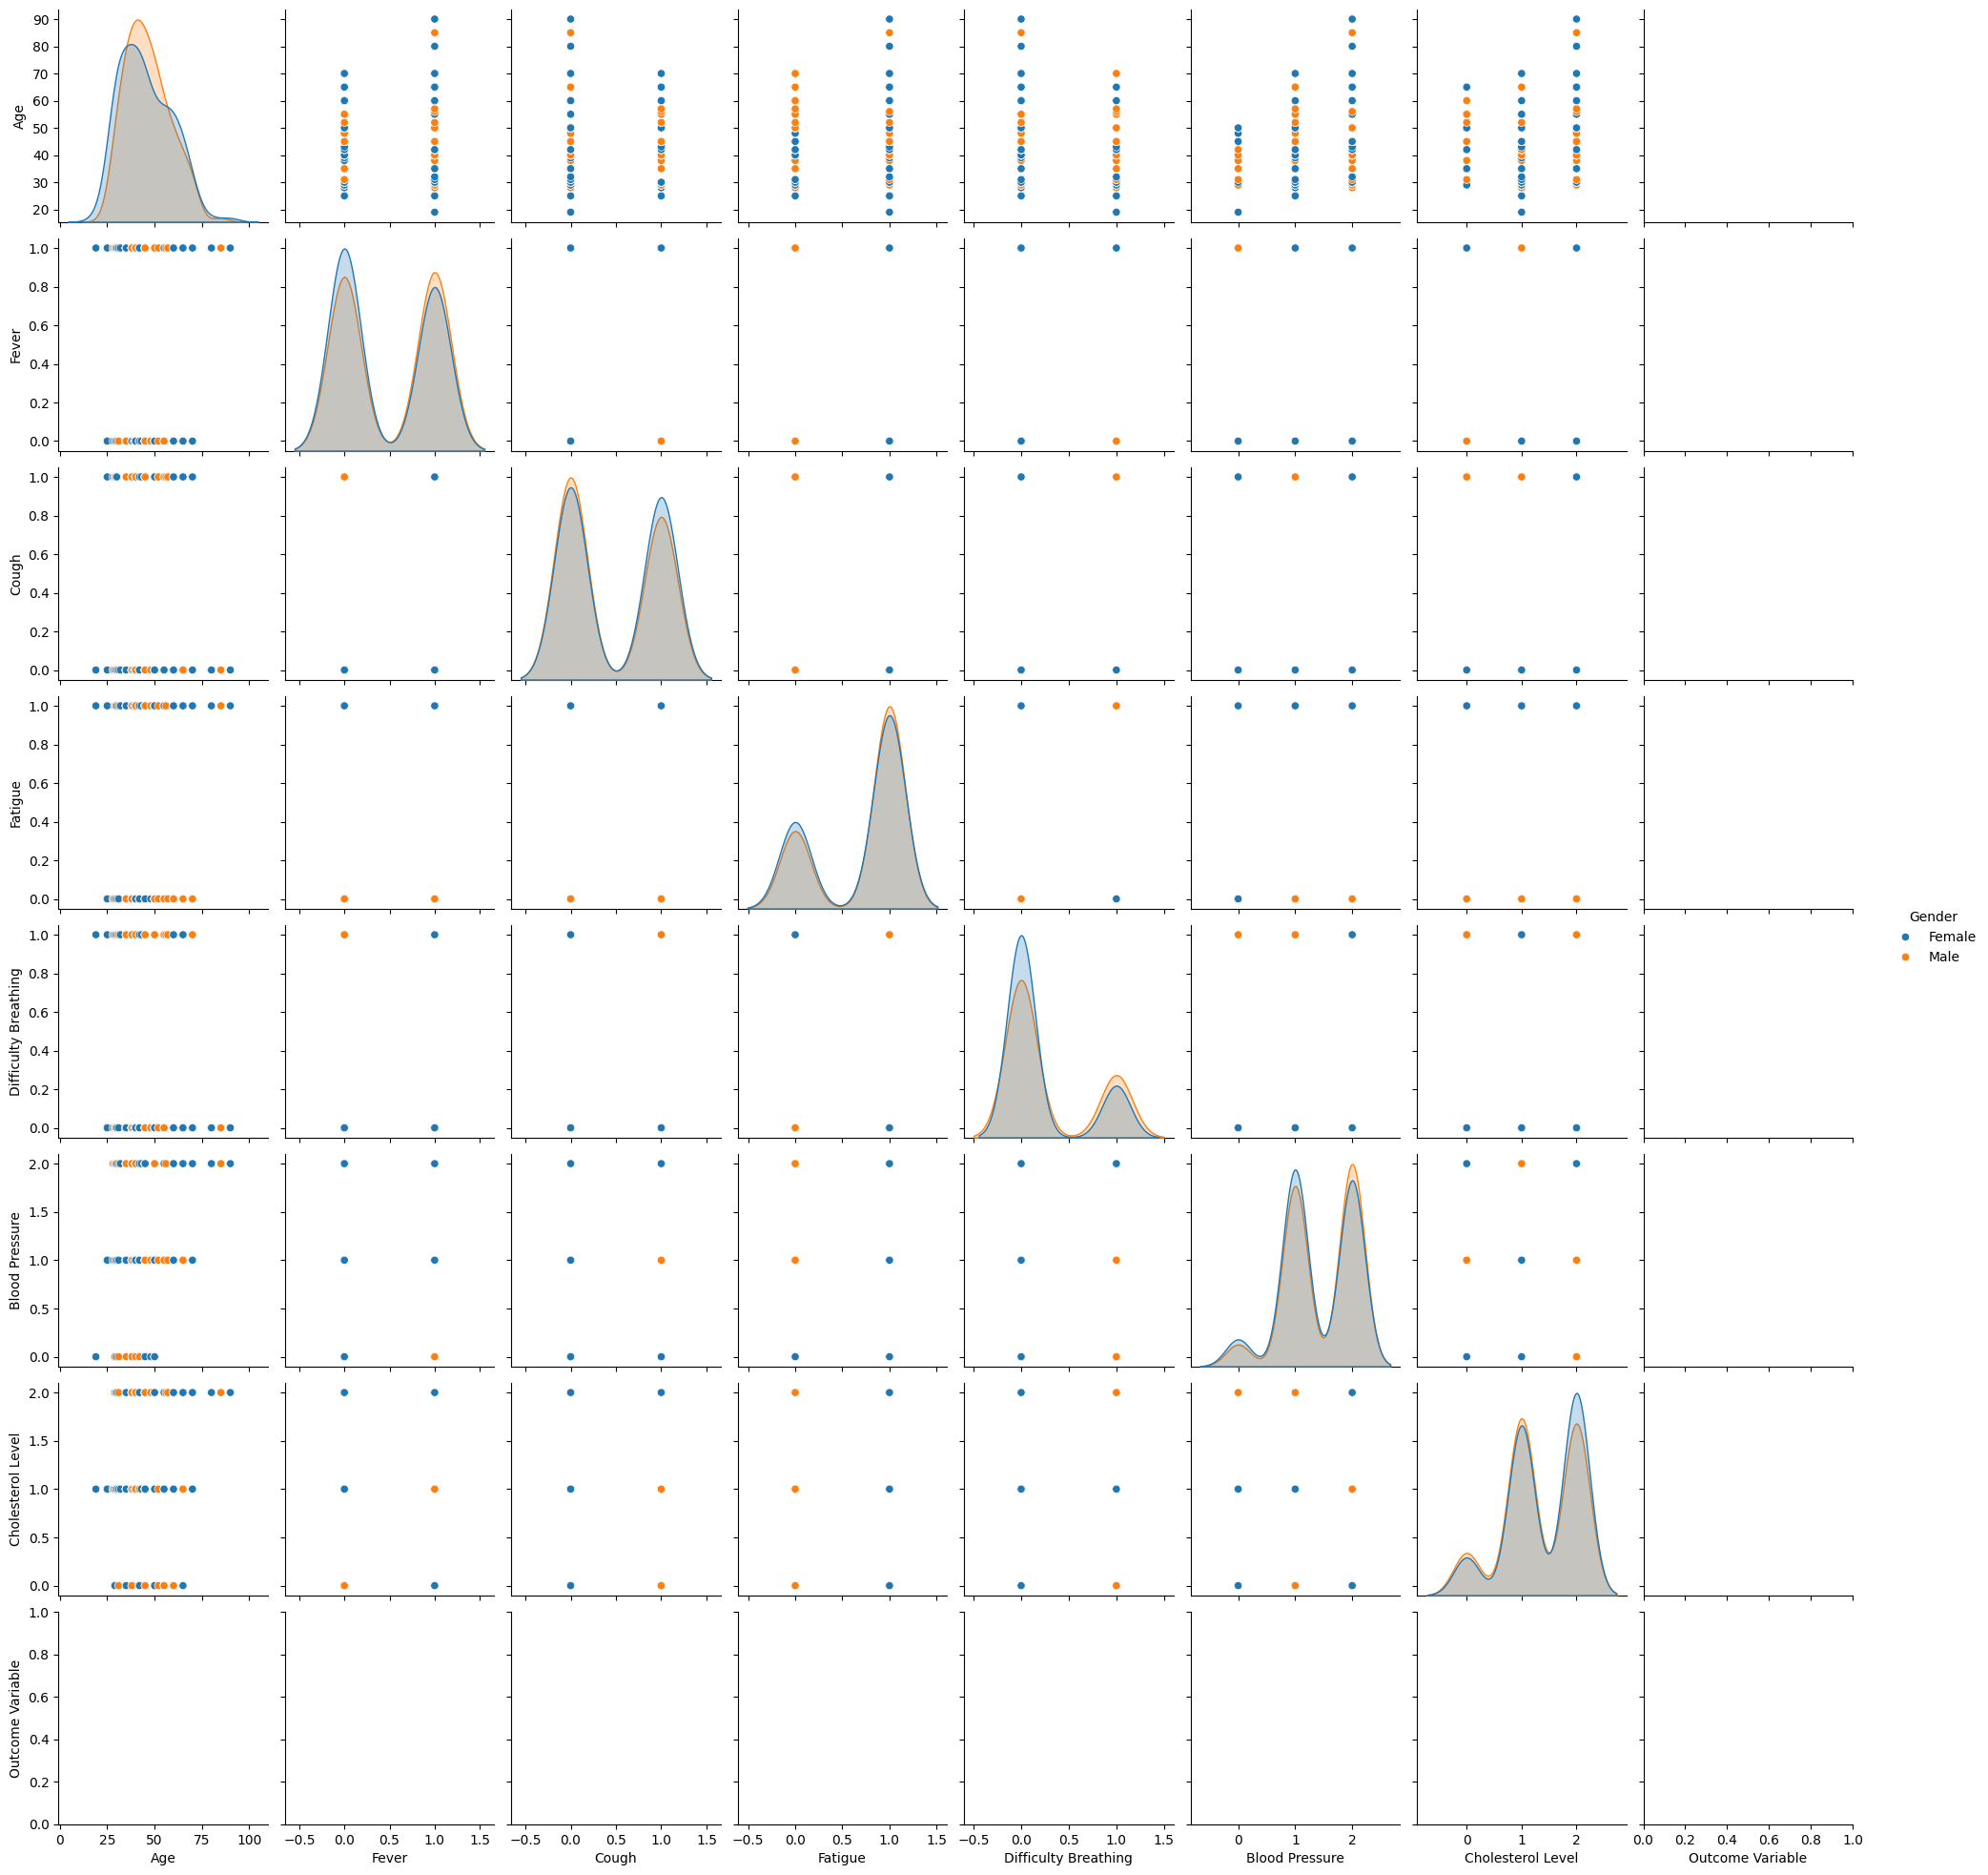

In [20]:
df['Fever'] = df['Fever'].map({'Yes': 1, 'No': 0})
df['Cough'] = df['Cough'].map({'Yes': 1, 'No': 0})
df['Fatigue'] = df['Fatigue'].map({'Yes': 1, 'No': 0})
df['Difficulty Breathing'] = df['Difficulty Breathing'].map({'Yes': 1, 'No': 0})
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 2, 'Normal': 1, 'Low': 0})
df['Cholesterol Level'] = df['Cholesterol Level'].map({'High': 2, 'Normal': 1, 'Low': 0})
df['Outcome Variable'] = df['Outcome Variable'].map({'Recovered': 1, 'Not Recovered': 0})

# Select numeric columns for the pair plot
numeric_cols = ['Age', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

# Create the pair plot
sns.pairplot(df, vars=numeric_cols, hue='Gender')

# Show the plot
plt.show()

In [25]:
import plotly.express as ex
ex.histogram(df['Age'],color=df['Gender'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'color=Female<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Female',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Female',
              'offsetgroup': 'Female',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 25, 25, 25, 25, 28, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30,
                          30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 32, 35, 35, 35, 35,
                          35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 38, 38, 38, 38, 38,
                          38, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 42, 42, 42,
                          42, 42, 42, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
                          45, 45, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55,
                          55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 60, 60, 60, 60, 60, 60, 60,
                          60, 60, 60, 60, 60, 60, 60, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
                          70, 70, 70, 70, 70, 70, 80, 90]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'color=Male<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Male',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Male',
              'offsetgroup': 'Male',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([25, 28, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 35,
                          35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
                          38, 38, 38, 38, 38, 38, 38, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
                          40, 40, 40, 40, 42, 42, 42, 42, 42, 42, 42, 42, 45, 45, 45, 45, 45, 45,
                          45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 48, 50, 50, 50,
                          50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 52, 52,
                          55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 57, 60, 60, 60, 60, 60,
                          60, 60, 60, 60, 60, 60, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70,
                          70, 70, 70, 85]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings